<a href="https://colab.research.google.com/github/PUNNYA-P-GAUR/Machine-Learning/blob/main/CNN%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 88s 55ms/step - loss: 1.5625 - accuracy: 0.4306 - val_loss: 1.3109 - val_accuracy: 0.5236
Epoch 2/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.2035 - accuracy: 0.5719 - val_loss: 1.1938 - val_accuracy: 0.5790
Epoch 3/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.0539 - accuracy: 0.6258 - val_loss: 1.0997 - val_accuracy: 0.6164
Epoch 4/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.9577 - accuracy: 0.6627 - val_loss: 0.9741 - val_accuracy: 0.6534
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8942 - accuracy: 0.6855 - val_loss: 0.9623 - val_accuracy: 0.6583
Epoch 6/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.8309 - accuracy: 0.7083 - val_loss: 0.9695 - val_accuracy: 0.6559
Epoch 7/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.7922 - accuracy: 0.7232 - val_loss: 0.9000 -

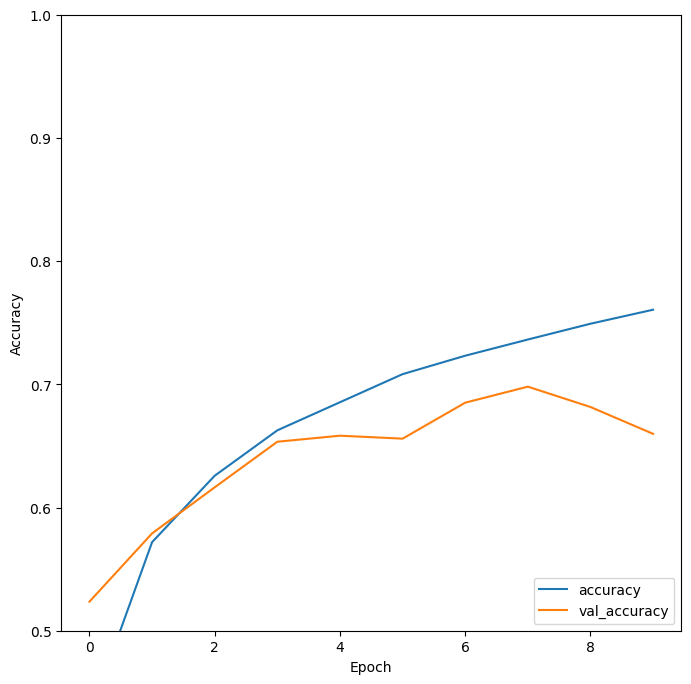

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')